<a href="https://colab.research.google.com/github/kvarun2300/Blinkit-Analysis/blob/main/Blinkit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/sample_data/blinkit_data.csv")

In [ ]:
print("Size of data:", df.shape)

Size of data: (8523, 12)


In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [ ]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [ ]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

###Business Requirements

In [ ]:
#total sales
total_sales = df['Sales'].sum()

#average sales
avg_sales = df['Sales'].mean()

#no of items sold
no_of_items_sold = df['Sales'].count()

#Average ratings
avg_ratings = df['Rating'].mean()

#Display
print(f"Total sales: ${total_sales:,.1f}")
print(f"Average sales: ${avg_sales:,.1f}")
print(f"No of Items sold:", no_of_items_sold)
print(f"Average Ratings: {avg_ratings:,.1f}")


Total sales: $1,201,681.5
Average sales: $141.0
No of Items sold: 8523
Average Ratings: 4.0


###Chart Requiremants

####Total Sales by fat content

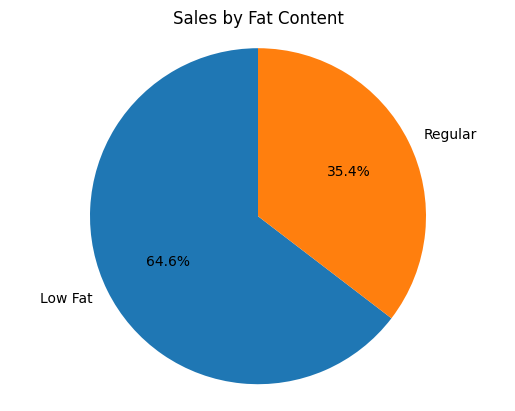

In [ ]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
        autopct = '%.1f%%',
        startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

####Total Sales by Item Type

In [ ]:
print(df['Item Type'].unique())

['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']


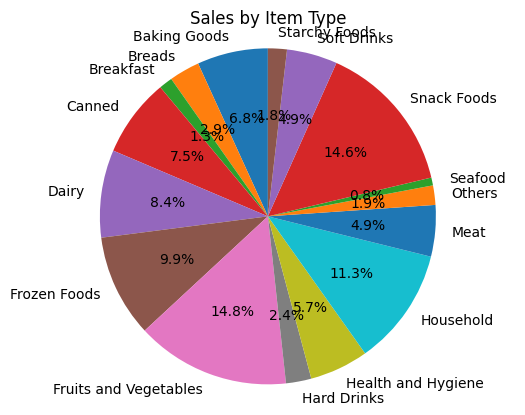

In [ ]:
sales_by_item = df.groupby('Item Type')['Sales'].sum()

plt.pie(sales_by_item, labels = sales_by_item.index,
        autopct = '%.1f%%',
        startangle = 90)

plt.title('Sales by Item Type')
plt.axis('equal')
plt.show()

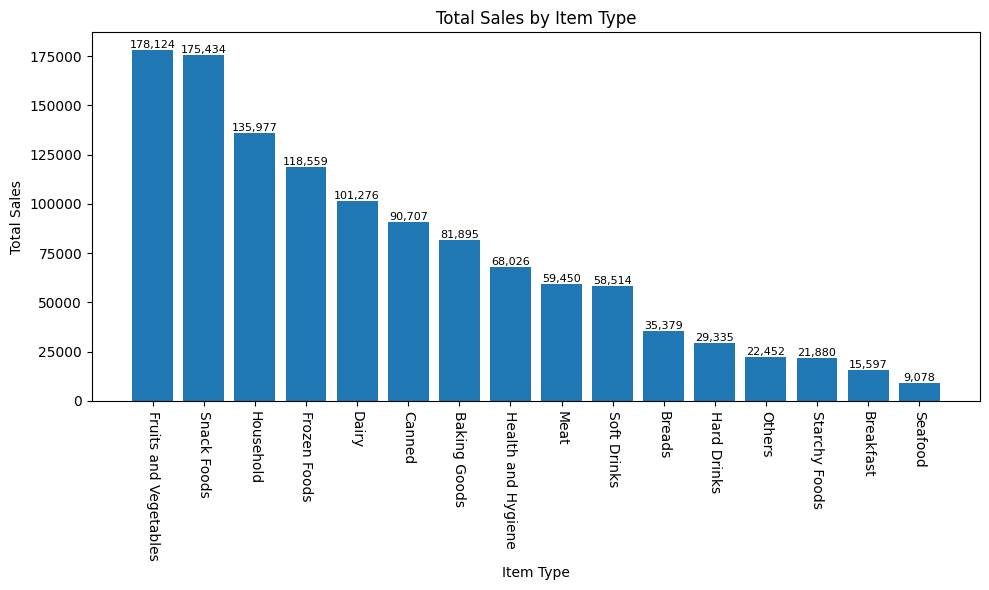

In [ ]:
sales_by_item = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_item.index, sales_by_item.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
           f'{bar.get_height():,.0f}', ha= 'center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

####Fat Content by Outlet for Total Sales

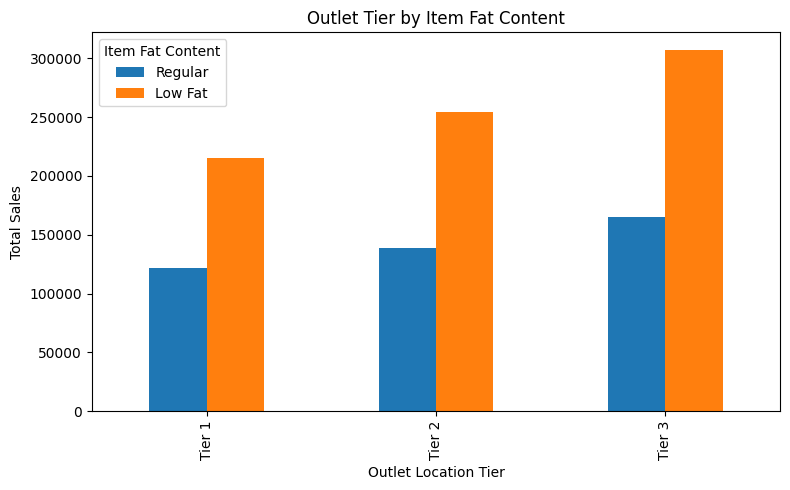

In [ ]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind= 'bar', figsize=(8,5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title= 'Item Fat Content')
plt.tight_layout()
plt.show()

####Sales by Outlet Size

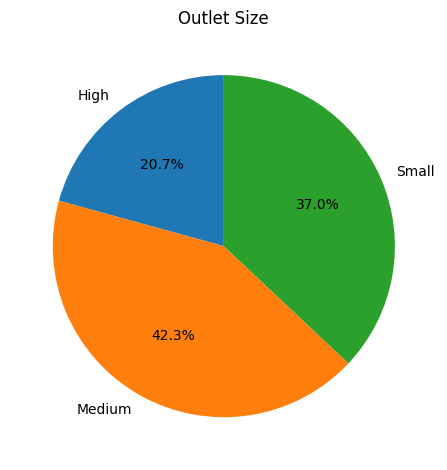

In [ ]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.pie(sales_by_size, labels = sales_by_size.index,
        autopct = '%.1f%%',
        startangle = 90)

plt.title('Outlet Size')
plt.tight_layout()
plt.show()